# KingsCollege site figure
- This script is used to visualize KingsCollege site flux;
- Simulations: CNTL, WRF_LCZ, LI_LCZ;

In [11]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cftime
import string
import matplotlib.dates as mdates
from scipy.stats import gaussian_kde

In [31]:
df = pd.read_csv('export_uk_kingscollege_df.csv')
df['time'] = pd.to_datetime(df['time'])
sequence = ['Rn', 'SWup', 'LWup', 'Qh', 'Qle', 'Qtau']
sequence2 = ['$R_{n}$', '$SW_{up}$', '$LW_{up}$', '$Q_{h}$', '$Q_{le}$', '$Q_{tau}$']
entity = ['obs', 'def', 'wrflcz', 'lilcz']
label1 = ['Observation: mean', 'CNTL: mean', 'WRF_LCZ: mean', 'LI_LCZ: mean']
label2 = ['Observation: 5-95% range', 'CNTL: 5-95% range', 'WRF_LCZ: 5-95% range', 'LI_LCZ: 5-95% range']
#lc0 = '#083550'
lc0 = '#1b9e77'
lc1 = '#d95f02'
lc2 = '#7570b3'
lc3 = '#e7298a'
#lc1 = '#006bac'
#lc2 = '#3da4e3'
#lc3 = '#6c64d4'
lc = [lc0, lc1, lc2, lc3]
alpha = [0.2, 0.15, 0.1, 0.1]
labelfont = 6
linewidth = 0.5
labelcolor = '#6b6b6b'
padding = 4
metric = ['7-day mean', 'Diurnal mean']
pad = 1
xwidth = 0.5
length = 2
handletextpad = 0.5
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))
mid_date = ['2004-01-01 00:00:00', '2004-05-01 00:00:00', '2014-01-01 00:00:00', '2012-01-01 00:00:00', '2012-01-01 00:00:00',
            '2004-09-01T00:00:00', '2020-01-01T00:00:00', '2018-01-01T00:00:00', '2018-01-01T00:00:00', '2016-01-01T00:00:00',
            '2012-01-01T00:00:00', '2020-01-01T00:00:00', '2010-01-01T00:00:00', '2010-01-01T00:00:00', '2007-01-01T00:00:00',
            '2013-01-01T00:00:00', '2012-01-01T00:00:00', '2004-01-01T00:00:00', '2008-01-01T00:00:00', '2009-05-29T11:30:00',
            '2012-06-01T00:00:00']
psites = ["AU-Preston","AU-SurreyHills","CA-Sunset","FI-Kumpula","FI-Torni",
          "FR-Capitole","GR-HECKOR","JP-Yoyogi","KR-Jungnang","KR-Ochang",
          "MX-Escandon","NL-Amsterdam","PL-Lipowa","PL-Narutowicza","SG-TelokKurau06",
          "UK-KingsCollege","UK-Swindon","US-Baltimore","US-Minneapolis1","US-Minneapolis2",
          "US-WestPhoenix"]
sitesequence = 15
mid_time = mid_date[sitesequence]
GRIDNAME = psites[sitesequence]

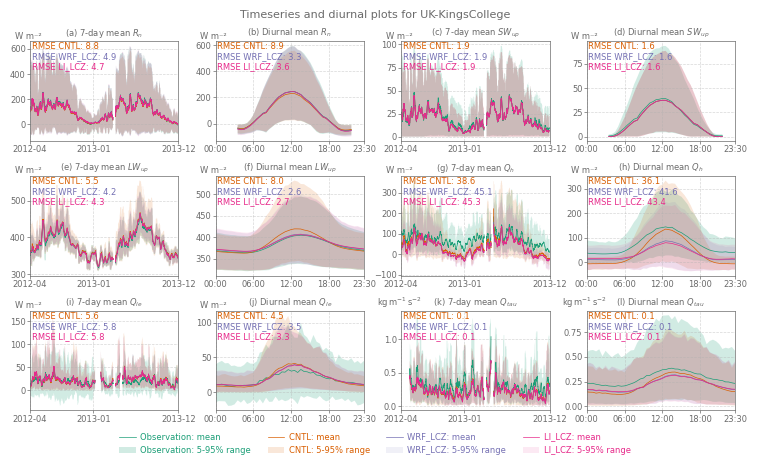

In [32]:
diurnal_mean = df.groupby('diurnal').mean().reset_index()
diurnal_5 = df.groupby('diurnal').quantile(0.05).reset_index()
diurnal_95 = df.groupby('diurnal').quantile(0.95).reset_index()
numeric_cols = df.columns
cols = numeric_cols.drop(['time','hour', 'minute','diurnal'])
seven_day_mean = df[cols].rolling(window=336, min_periods=48).mean().reset_index()
seven_day_5 = df[cols].rolling(window=336, min_periods=48).quantile(0.05).reset_index()
seven_day_95 = df[cols].rolling(window=336, min_periods=48).quantile(0.95).reset_index()
    
fig, axs = plt.subplots(3, 4, figsize=(7.5, 4.5))
axs = axs.flatten()
for i in range(12):
    col_name_obs = sequence[i//2]+'_' + entity[0]
    col_name_def = sequence[i//2]+'_' + entity[1]
    col_name_wrflcz = sequence[i//2]+'_' + entity[2]
    col_name_lilcz = sequence[i//2]+'_' + entity[3]
    if i%2==0: # analyse period
        for j in range(4):
            col_name = sequence[i//2]+'_' + entity[j]
            axs[i].plot(df.time, seven_day_mean[col_name], label=label1[j], color=lc[j], linewidth=linewidth)
            axs[i].fill_between(df.time, seven_day_5[col_name], seven_day_95[col_name], alpha=alpha[j], color=lc[j],  edgecolor='none', label=label2[j])
        xticks = [df['time'].iloc[0]] + [pd.to_datetime(mid_time)] + [df['time'].iloc[-1]]
        axs[i].set_xticks(xticks)
                #axs[i].set_xticks([df.time.iloc[0], mid_time, df.time.iloc[-1]])
        axs[i].set_xlim([df.time.iloc[0], df.time.iloc[-1]])
        axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

        axs[i].text(0.01,0.9,'RMSE CNTL: {:.1f}'.format(rmse(seven_day_mean[col_name_def] , seven_day_mean[col_name_obs])),
                    fontsize=labelfont, color=lc[1], horizontalalignment='left',
                           verticalalignment='bottom', transform=axs[i].transAxes)
        axs[i].text(0.01,0.8,'RMSE WRF_LCZ: {:.1f}'.format(rmse(seven_day_mean[col_name_wrflcz] , seven_day_mean[col_name_obs])),
                    fontsize=labelfont, color=lc[2], horizontalalignment='left',
                           verticalalignment='bottom', transform=axs[i].transAxes)
        axs[i].text(0.01,0.7,'RMSE LI_LCZ: {:.1f}'.format(rmse(seven_day_mean[col_name_lilcz] , seven_day_mean[col_name_obs])), 
                           fontsize=labelfont, color=lc[3], horizontalalignment='left',
                           verticalalignment='bottom', transform=axs[i].transAxes)
            
            
    if i%2==1: # dinural time variation
        for j in range(4):
            col_name = sequence[i//2]+'_' + entity[j]
            axs[i].plot(diurnal_mean.diurnal, diurnal_mean[col_name], label=entity[j], color=lc[j], linewidth=linewidth)
            axs[i].fill_between(diurnal_mean.diurnal, diurnal_5[col_name], diurnal_95[col_name], alpha=alpha[j], color=lc[j],  edgecolor='none')
        axs[i].set_xticks([diurnal_mean.diurnal.iloc[0], '06:00', '12:00', '18:00', diurnal_mean.diurnal.iloc[-1]])
        axs[i].set_xlim([diurnal_mean.diurnal.iloc[0], diurnal_mean.diurnal.iloc[-1]])
             
        axs[i].text(0.01,0.9,'RMSE CNTL: {:.1f}'.format(rmse(diurnal_mean[col_name_def], diurnal_mean[col_name_obs])),
                    fontsize=labelfont, color=lc[1], horizontalalignment='left',
                           verticalalignment='bottom', transform=axs[i].transAxes)
        axs[i].text(0.01,0.8,'RMSE WRF_LCZ: {:.1f}'.format(rmse(diurnal_mean[col_name_wrflcz] , diurnal_mean[col_name_obs])),
                    fontsize=labelfont, color=lc[2], horizontalalignment='left',
                           verticalalignment='bottom', transform=axs[i].transAxes)
        axs[i].text(0.01,0.7,'RMSE LI_LCZ: {:.1f}'.format(rmse(diurnal_mean[col_name_lilcz], diurnal_mean[col_name_obs])), 
                           fontsize=labelfont, color=lc[3], horizontalalignment='left',
                           verticalalignment='bottom', transform=axs[i].transAxes)
        
    axs[i].set_title(f'({string.ascii_lowercase[i]}) {metric[i%2]} {sequence2[i//2]}',fontsize=labelfont,color=labelcolor, pad = padding)   
    axs[i].set_ylabel('W m⁻²',labelpad=5, rotation=0, ha='center', fontsize=labelfont,color=labelcolor)
    axs[i].yaxis.set_label_coords(-0.05, 1.025)
    axs[i].tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelcolor=labelcolor, color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length)
    axs[i].tick_params(axis='x', which='both', top=False, bottom=True, labelbottom=True, labelcolor=labelcolor,color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length)
    axs[i].spines['top'].set_color(labelcolor)
    axs[i].spines['right'].set_color(labelcolor)
    axs[i].spines['bottom'].set_color(labelcolor)
    axs[i].spines['left'].set_color(labelcolor)
    axs[i].spines['top'].set_linewidth(xwidth)
    axs[i].spines['right'].set_linewidth(xwidth)
    axs[i].spines['bottom'].set_linewidth(xwidth)
    axs[i].spines['left'].set_linewidth(xwidth)
    axs[i].grid(True,linestyle='--',linewidth=0.5, alpha=0.5)
    if i >=10:
        axs[i].set_ylabel(r'$\mathrm{kg \, m^{-1} \, s^{-2}}$', labelpad=5, rotation=0, ha='center', fontsize=labelfont,color=labelcolor)
    else:    
        axs[i].set_ylabel('W m⁻²', labelpad=5, rotation=0, ha='center', fontsize=labelfont,color=labelcolor)
    axs[i].yaxis.set_label_coords(-0.015, 1.01)
plt.subplots_adjust(left=0.04, right=0.98, bottom=0.1, top=0.92, wspace=0.25, hspace= 0.35)
lines, labels = axs[0].get_legend_handles_labels()
legend = fig.legend(lines, labels, bbox_to_anchor=(0.5, -0.015), loc='lower center', frameon=False, 
                        handletextpad=handletextpad, fontsize=labelfont, ncol=4)
llc = [lc0, lc0, lc1, lc1, lc2, lc2, lc3, lc3]
for i, text in enumerate(legend.get_texts()):
    text.set_color(llc[i])
plt.suptitle('Timeseries and diurnal plots for ' + GRIDNAME, fontsize=labelfont+2, color=labelcolor,x=0.5, y=0.99, ha='center', va='top')
output_dir = '/mnt/iusers01/fatpou01/sees01/a16404ys/scratch/output_analysis/project2/sp/uk_kingscollege/'
fig.savefig(output_dir + '4lines_'+ GRIDNAME +'.png', dpi=300)    
fig.savefig(output_dir + '4lines_'+ GRIDNAME +'.pdf', dpi=600)  

# Description

In [59]:
seven_day_mean

,index,LWup_obs,SWup_obs,Qh_obs,Qle_obs,Qtau_obs,lndgrid,LWup_def,SWup_def,Qh_def,...,LWup_wrflcz,SWup_wrflcz,Qh_wrflcz,Qle_wrflcz,Qtau_wrflcz,LWup_lilcz,SWup_lilcz,Qh_lilcz,Qle_lilcz,Qtau_lilcz
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30566,30566,344.601101,9.31594,9.251287,12.525817,0.339585,0.0,343.890129,6.299344,-19.702116,...,342.116594,6.299344,-27.391989,16.013724,0.201557,342.223333,6.299344,-27.330794,16.096704,0.202551
30567,30567,344.605029,9.31594,9.262772,12.512814,0.339056,0.0,343.896334,6.299344,-19.690651,...,342.120366,6.299344,-27.377631,16.038593,0.202082,342.226093,6.299344,-27.314653,16.118565,0.203043
30568,30568,344.590535,9.31594,9.250594,12.482662,0.338551,0.0,343.877550,6.299344,-19.733804,...,342.100740,6.299344,-27.414052,16.044508,0.202245,342.206908,6.299344,-27.342250,16.121047,0.203168
30569,30569,344.569255,9.31594,9.251749,12.411749,0.338362,0.0,343.853234,6.299344,-19.742930,...,342.078220,6.299344,-27.412554,16.034586,0.202234,342.185116,6.299344,-27.340344,16.111025,0.203126


In [60]:
df

,time,LWup_obs,SWup_obs,Qh_obs,Qle_obs,Qtau_obs,lndgrid,LWup_def,SWup_def,Qh_def,...,Qle_wrflcz,Qtau_wrflcz,LWup_lilcz,SWup_lilcz,Qh_lilcz,Qle_lilcz,Qtau_lilcz,hour,minute,diurnal
0,2012-04-04 00:00:00,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,00:00
1,2012-04-04 00:30:00,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,30,00:30
2,2012-04-04 01:00:00,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,01:00
3,2012-04-04 01:30:00,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,30,01:30
4,2012-04-04 02:00:00,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30566,2013-12-31 19:00:00,344.410004,NaN,18.209999,13.84,0.234095,0,343.213928,NaN,-16.395554,...,29.614624,0.221264,344.087799,NaN,-13.597271,29.792339,0.226079,19,0,19:00
30567,2013-12-31 19:30:00,343.339996,NaN,11.410000,17.99,0.155406,0,340.834473,NaN,-23.912714,...,27.424082,0.253514,341.808960,NaN,-19.406370,27.755402,0.258587,19,30,19:30
30568,2013-12-31 20:00:00,340.529999,NaN,5.430000,15.04,0.162532,0,337.237793,NaN,-28.519697,...,21.114172,0.106125,338.649902,NaN,-23.087069,21.863586,0.113614,20,0,20:00
30569,2013-12-31 20:30:00,339.470001,NaN,8.250000,4.84,0.200483,0,336.669281,NaN,-32.902271,...,24.705360,0.205438,338.185303,NaN,-25.940220,25.216858,0.213636,20,30,20:30


In [62]:
#df.to_csv('export_uk_df.csv')
seven_day_mean['time'] = df['time']
seven_day_mean.to_csv('export_uk_7day.csv')

In [63]:
print(seven_day_mean['LWup_obs'].mean(), seven_day_mean['LWup_def'].mean(), seven_day_mean['LWup_wrflcz'].mean(), seven_day_mean['LWup_lilcz'].mean())
print( round((seven_day_mean['LWup_def']- seven_day_mean['LWup_obs']).mean(),2), 
      round((seven_day_mean['LWup_wrflcz']-seven_day_mean['LWup_obs']).mean(),2), 
      round((seven_day_mean['LWup_lilcz']-seven_day_mean['LWup_obs']).mean(),2))
print( round((seven_day_mean['LWup_def']- seven_day_mean['LWup_obs']).std(),2), 
      round((seven_day_mean['LWup_wrflcz']-seven_day_mean['LWup_obs']).std(),2), 
      round((seven_day_mean['LWup_lilcz']-seven_day_mean['LWup_obs']).std(),2))

380.5247266484339 384.8382155661288 383.024761340147 383.09949043052586
4.31 2.5 2.57
3.45 3.41 3.45


In [67]:
print(round((diurnal_mean['LWup_wrflcz']-diurnal_mean['LWup_obs']).mean(),2), 
      round((diurnal_mean['LWup_lilcz']-diurnal_mean['LWup_obs']).mean(),2))
print(round((diurnal_mean['LWup_wrflcz']-diurnal_mean['LWup_obs']).std(),2), 
      round((diurnal_mean['LWup_lilcz']-diurnal_mean['LWup_obs']).std(),2))

2.49 2.57
0.73 0.86


In [65]:
diurnal_mean

,diurnal,time,LWup_obs,SWup_obs,Qh_obs,Qle_obs,Qtau_obs,lndgrid,LWup_def,SWup_def,...,Qh_wrflcz,Qle_wrflcz,Qtau_wrflcz,LWup_lilcz,SWup_lilcz,Qh_lilcz,Qle_lilcz,Qtau_lilcz,hour,minute
0,00:00,2013-02-16 00:00:00,368.978149,NaN,37.107864,10.687767,0.230667,0.0,367.217926,NaN,...,9.969138,10.755898,0.169343,372.287628,NaN,13.186077,10.933187,0.172633,0.0,0.0
1,00:30,2013-02-16 00:30:00,368.460175,NaN,35.386906,10.966841,0.230804,0.0,366.740448,NaN,...,10.132294,10.546378,0.166101,371.789429,NaN,13.548819,10.738297,0.169551,0.0,30.0
2,01:00,2013-02-16 01:00:00,367.603729,NaN,35.267212,11.555216,0.232187,0.0,366.095062,NaN,...,10.286006,10.680665,0.165146,371.122467,NaN,13.894144,10.897151,0.168860,1.0,0.0
3,01:30,2013-02-16 01:30:00,367.055878,NaN,34.145683,10.246067,0.223178,0.0,365.619843,NaN,...,10.001425,10.514145,0.156723,370.602997,NaN,13.788540,10.764087,0.160739,1.0,30.0
4,02:00,2013-02-16 02:00:00,366.471497,NaN,33.792473,9.176048,0.217918,0.0,365.078033,NaN,...,9.825698,10.191563,0.160731,370.004089,NaN,13.758117,10.447473,0.164756,2.0,0.0
5,02:30,2013-02-16 02:30:00,365.897095,NaN,33.412251,8.360415,0.210671,0.0,364.549652,NaN,...,9.629966,10.077915,0.155398,369.400452,NaN,13.727299,10.341196,0.159789,2.0,30.0
6,03:00,2013-02-16 03:00:00,365.428680,NaN,33.463573,8.634274,0.214073,0.0,364.151978,NaN,...,9.300602,9.658520,0.156984,368.898560,NaN,13.468583,9.969198,0.161580,3.0,0.0
7,03:30,2013-02-16 03:30:00,365.022614,0.680986,33.952492,9.834349,0.206201,0.0,363.840393,0.005461,...,9.183133,9.363967,0.149580,368.490417,0.005461,13.507803,9.642113,0.154430,3.0,30.0
8,04:00,2013-02-16 04:00:00,364.617554,1.043147,34.810764,9.197115,0.203933,0.0,363.500336,0.078480,...,9.228721,9.509408,0.146639,368.017059,0.078480,13.672853,9.835212,0.151541,4.0,0.0
9,04:30,2013-02-16 04:30:00,364.303192,1.989947,34.592896,10.006502,0.202137,0.0,363.294373,0.671070,...,8.888434,9.201855,0.146095,367.624451,0.671070,13.426234,9.531624,0.151435,4.0,30.0


# examine sensible heat flux

In [68]:
var = 'Qh_def'
min_index = seven_day_mean[var].idxmin()
min_row = seven_day_mean.loc[min_index]
print(min_row)

index                        30254
LWup_obs                353.201816
SWup_obs                  9.317955
Qh_obs                   21.250729
Qle_obs                   20.47482
Qtau_obs                  0.424914
lndgrid                        0.0
LWup_def                351.677559
SWup_def                  6.450469
Qh_def                    -25.9346
Qle_def                  25.999079
Qtau_def                  0.322551
LWup_wrflcz               350.2308
SWup_wrflcz               6.450469
Qh_wrflcz               -33.089481
Qle_wrflcz                24.44082
Qtau_wrflcz               0.310642
LWup_lilcz              350.354978
SWup_lilcz                6.450469
Qh_lilcz                -32.637698
Qle_lilcz                24.553864
Qtau_lilcz                 0.31482
time           2013-12-25 07:00:00
Name: 30254, dtype: object


In [22]:
start_time = '2012-12-25 00:00:00'
end_time = '2012-12-26 00:00:00'
times_of_interest = pd.date_range(start=start_time, end=end_time, freq='30min')
times_of_interest

DatetimeIndex(['2012-12-25 00:00:00', '2012-12-25 00:30:00',
               '2012-12-25 01:00:00', '2012-12-25 01:30:00',
               '2012-12-25 02:00:00', '2012-12-25 02:30:00',
               '2012-12-25 03:00:00', '2012-12-25 03:30:00',
               '2012-12-25 04:00:00', '2012-12-25 04:30:00',
               '2012-12-25 05:00:00', '2012-12-25 05:30:00',
               '2012-12-25 06:00:00', '2012-12-25 06:30:00',
               '2012-12-25 07:00:00', '2012-12-25 07:30:00',
               '2012-12-25 08:00:00', '2012-12-25 08:30:00',
               '2012-12-25 09:00:00', '2012-12-25 09:30:00',
               '2012-12-25 10:00:00', '2012-12-25 10:30:00',
               '2012-12-25 11:00:00', '2012-12-25 11:30:00',
               '2012-12-25 12:00:00', '2012-12-25 12:30:00',
               '2012-12-25 13:00:00', '2012-12-25 13:30:00',
               '2012-12-25 14:00:00', '2012-12-25 14:30:00',
               '2012-12-25 15:00:00', '2012-12-25 15:30:00',
               '2012-12-

In [26]:
delta = sliced_ds_ko['URBAN_HEAT']-sliced_ds_wrf['URBAN_HEAT']
select_date = delta[delta['time'].isin(times_of_interest)]

print(select_date.mean())

<xarray.DataArray 'URBAN_HEAT' ()>
array(12.557889, dtype=float32)


In [27]:
delta = sliced_ds_ko['WASTEHEAT']-sliced_ds_wrf['WASTEHEAT']
select_date = delta[delta['time'].isin(times_of_interest)]

print(select_date.mean())

<xarray.DataArray 'WASTEHEAT' ()>
array(2.522545, dtype=float32)


In [28]:
delta = sliced_ds_ko['FSH_U']-sliced_ds_wrf['FSH_U']
select_date = delta[delta['time'].isin(times_of_interest)]

print(select_date.mean())

<xarray.DataArray 'FSH_U' ()>
array(6.270673, dtype=float32)


In [31]:
delta = sliced_ds_ob['Qh']
select_date = delta[delta['time'].isin(times_of_interest)]
print(select_date.mean())

<xarray.DataArray 'Qh' ()>
array(21.719582, dtype=float32)


In [29]:
delta = sliced_ds_ko['FSH_U']
select_date = delta[delta['time'].isin(times_of_interest)]
print(select_date.mean())

<xarray.DataArray 'FSH_U' ()>
array(-8.914458, dtype=float32)


In [24]:
delta = sliced_ds_wrf['FSH_U']
select_date = delta[delta['time'].isin(times_of_interest)]
print(select_date.mean())

<xarray.DataArray 'FSH_U' ()>
array(-15.185131, dtype=float32)


In [25]:
delta = sliced_ds_li['FSH_U']
select_date = delta[delta['time'].isin(times_of_interest)]
print(select_date.mean())

<xarray.DataArray 'FSH_U' ()>
array(-13.390544, dtype=float32)


In [83]:
delta = sliced_ds_ob['Qh']
select_date = delta[delta['time'].isin(times_of_interest)]
print(select_date.mean())

<xarray.DataArray 'Qh' ()>
array(11.789287, dtype=float32)


# examine momentum flux

In [17]:
start_time = '2012-12-25 00:00:00'
end_time = '2012-12-26 00:00:00'
times_of_interest = pd.date_range(start=start_time, end=end_time, freq='30min')
times_of_interest

DatetimeIndex(['2012-12-25 00:00:00', '2012-12-25 00:30:00',
               '2012-12-25 01:00:00', '2012-12-25 01:30:00',
               '2012-12-25 02:00:00', '2012-12-25 02:30:00',
               '2012-12-25 03:00:00', '2012-12-25 03:30:00',
               '2012-12-25 04:00:00', '2012-12-25 04:30:00',
               '2012-12-25 05:00:00', '2012-12-25 05:30:00',
               '2012-12-25 06:00:00', '2012-12-25 06:30:00',
               '2012-12-25 07:00:00', '2012-12-25 07:30:00',
               '2012-12-25 08:00:00', '2012-12-25 08:30:00',
               '2012-12-25 09:00:00', '2012-12-25 09:30:00',
               '2012-12-25 10:00:00', '2012-12-25 10:30:00',
               '2012-12-25 11:00:00', '2012-12-25 11:30:00',
               '2012-12-25 12:00:00', '2012-12-25 12:30:00',
               '2012-12-25 13:00:00', '2012-12-25 13:30:00',
               '2012-12-25 14:00:00', '2012-12-25 14:30:00',
               '2012-12-25 15:00:00', '2012-12-25 15:30:00',
               '2012-12-

In [18]:
delta = sliced_ds_ko['TAUX']
select_date = delta[delta['time'].isin(times_of_interest)]
print(select_date.mean())

<xarray.DataArray 'TAUX' ()>
array(-0.28040463, dtype=float32)


In [19]:
delta = sliced_ds_wrf['TAUX']
select_date = delta[delta['time'].isin(times_of_interest)]
print(select_date.mean())

<xarray.DataArray 'TAUX' ()>
array(-0.2652955, dtype=float32)


In [20]:
delta = sliced_ds_li['TAUX']
select_date = delta[delta['time'].isin(times_of_interest)]
print(select_date.mean())

<xarray.DataArray 'TAUX' ()>
array(-0.2698817, dtype=float32)


In [33]:
delta = sliced_ds_ob['Qtau']
select_date = delta[delta['time'].isin(times_of_interest)]
print(select_date.mean())

<xarray.DataArray 'Qtau' ()>
array(0.37533382, dtype=float32)


# latent heat flux

In [7]:
print(df['Qle_obs'].mean(), df['Qle_def'].mean(), df['Qle_wrflcz'].mean(), df['Qle_lilcz'].mean())

18.376408 19.77735 19.972143 19.971203
